In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from copy import copy
import string

## Leitura dos datasets

In [2]:
local = "..\\dataset\\incoming\\"

In [24]:
# leitura dos datasets
customers = pd.read_csv(local+"olist_customers_dataset.csv")
order_items = pd.read_csv(local+"olist_order_items_dataset.csv")
order_payments = pd.read_csv(local+"olist_order_payments_dataset.csv")
orders = pd.read_csv(local+"olist_orders_dataset.csv")
products = pd.read_csv(local+"olist_products_dataset.csv")
sellers = pd.read_csv(local+"olist_sellers_dataset.csv")
reviews = pd.read_csv(local+"olist_order_reviews_dataset.csv")

In [19]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [20]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93


In [21]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [22]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [23]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [24]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


In [29]:
reviews.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


## Análises Univariadas [Thais]

In [25]:
dfs = {"customers": customers, "sellers": sellers, "products": products, "orders": orders, "order_items": order_items, "order_payments": order_payments, "reviews": reviews}

In [26]:
# verificando a existência de linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----linhas nulas:\n{dfs[names].isna().sum()}\n\n-----tipo de dado:\n{dfs[names].dtypes}\n---------------\n\n")

customers
-----linhas nulas:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

-----tipo de dado:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
---------------


sellers
-----linhas nulas:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

-----tipo de dado:
seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object
---------------


products
-----linhas nulas:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_lengt

In [27]:
# deletando linhas nulas
for names, tables in dfs.items():
    print(f"{names}\n-----deletando linhas\n")
    dfs[names].dropna(axis=0, inplace=True)

customers
-----deletando linhas

sellers
-----deletando linhas

products
-----deletando linhas

orders
-----deletando linhas

order_items
-----deletando linhas

order_payments
-----deletando linhas

reviews
-----deletando linhas



### 1) Describe dos datasets

In [28]:
customers[["customer_city", "customer_state"]].describe()

,customer_city,customer_state
count,99441,99441
unique,4119,27
top,sao paulo,SP
freq,15540,41746


In [29]:
sellers[["seller_city", "seller_state"]].describe()

,seller_city,seller_state
count,3095,3095
unique,611,23
top,sao paulo,SP
freq,694,1849


In [62]:
products[["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]].describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000
mean,2276.956586,30.854545,16.958813,23.208596
std,4279.291845,16.955965,13.636115,12.078762
min,0.000000,7.000000,2.000000,6.000000
25%,300.000000,18.000000,8.000000,15.000000
50%,700.000000,25.000000,13.000000,20.000000
75%,1900.000000,38.000000,21.000000,30.000000
max,40425.000000,105.000000,105.000000,118.000000


In [64]:
products[["product_category_name"]].describe()

,product_category_name
count,32340
unique,73
top,cama_mesa_banho
freq,3029


In [66]:
orders[["order_status"]].describe()

,order_status
count,96461
unique,2
top,delivered
freq,96455


In [48]:
order_items[["price", "freight_value"]].describe()

,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


In [70]:
order_payments[["payment_type"]].describe()

,payment_type
count,103886
unique,5
top,credit_card
freq,76795


In [71]:
order_payments[["payment_value"]].describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


### 2) Análise de customers e sellers

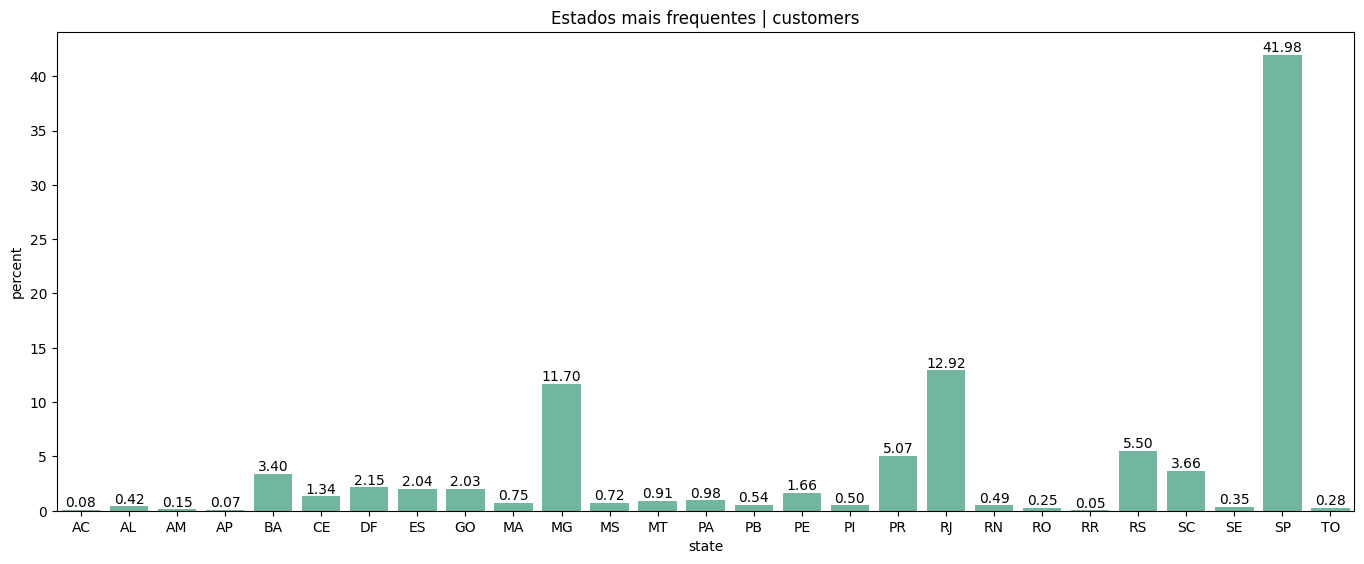

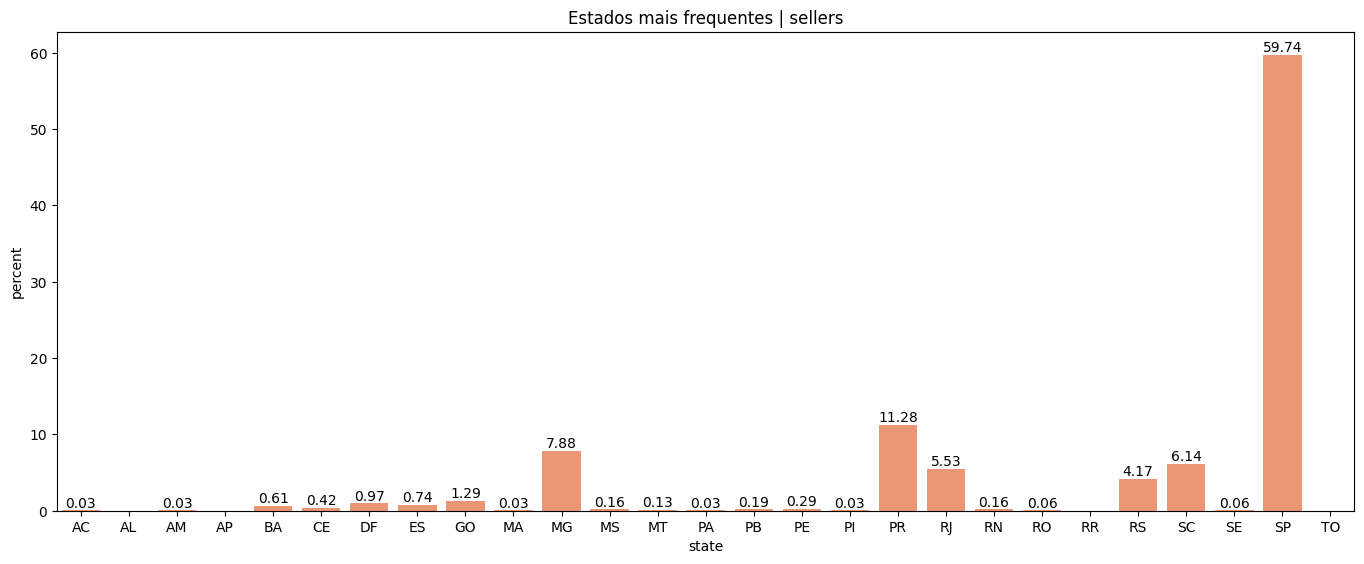

In [30]:
# renomeando as colunas para facilitar a manipulação
customers.rename(columns={"customer_city": "city", "customer_state": "state", "customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)
sellers.rename(columns={"seller_city": "city", "seller_state": "state", "seller_zip_code_prefix": "zip_code_prefix"}, inplace=True)

# armazenando os datasets de customers e sellers numa dict para facilitar a manipulação
dfs2 = {"customers": customers, "sellers": sellers}

# index para ordenar os dados no gráfico
state_order = sorted(customers["state"])
c = 0

for names, tables in dfs2.items():
    fig0, ax0 = plt.subplots(figsize=(14,6))

    sns.countplot(data=tables, x="state", order=state_order, stat="percent", color=sns.color_palette("Set2")[c], ax=ax0)
    ax0.set_title(f"Estados mais frequentes | {names}")

    for i in ax0.containers:
        ax0.bar_label(i, fmt="%.2f")
    c=+1
    plt.tight_layout(pad=2)
    plt.show()

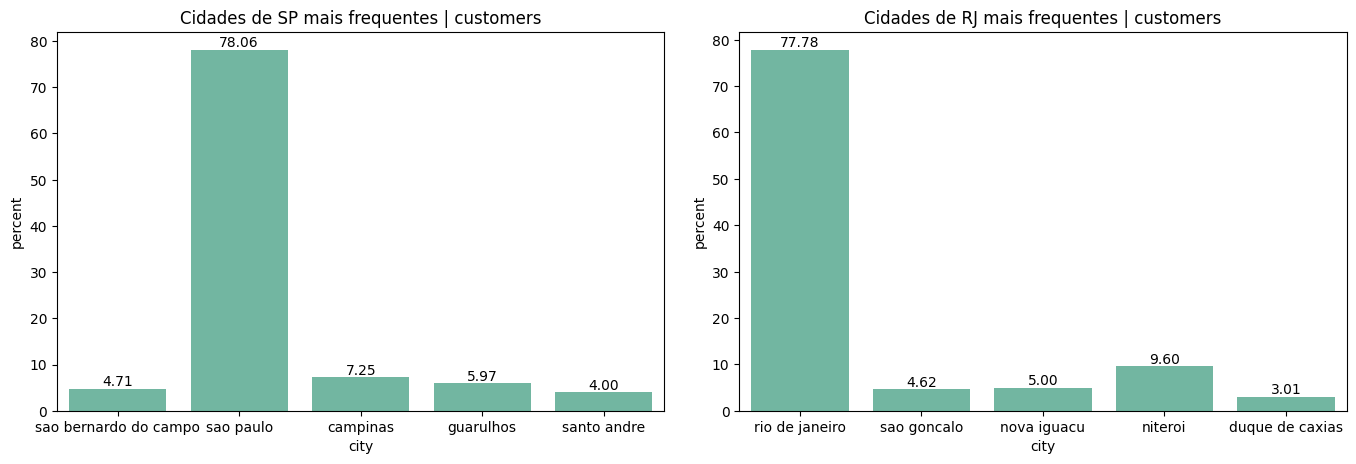

In [31]:
customers_top5_SP = customers[customers["state"]=="SP"]["city"].value_counts().head().index
customers_top5_RJ = customers[customers["state"]=="RJ"]["city"].value_counts().head().index

fig1, ax1 = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=customers[customers["city"].isin(customers_top5_SP)], x="city", stat="percent", color=sns.color_palette("Set2")[0], ax=ax1[0])
ax1[0].set_title(f"Cidades de SP mais frequentes | customers")
for i in ax1[0].containers:
    ax1[0].bar_label(i, fmt="%.2f")

sns.countplot(data=customers[customers["city"].isin(customers_top5_RJ)], x="city", stat="percent", color=sns.color_palette("Set2")[0], ax=ax1[1])
ax1[1].set_title(f"Cidades de RJ mais frequentes | customers")
for i in ax1[1].containers:
    ax1[1].bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

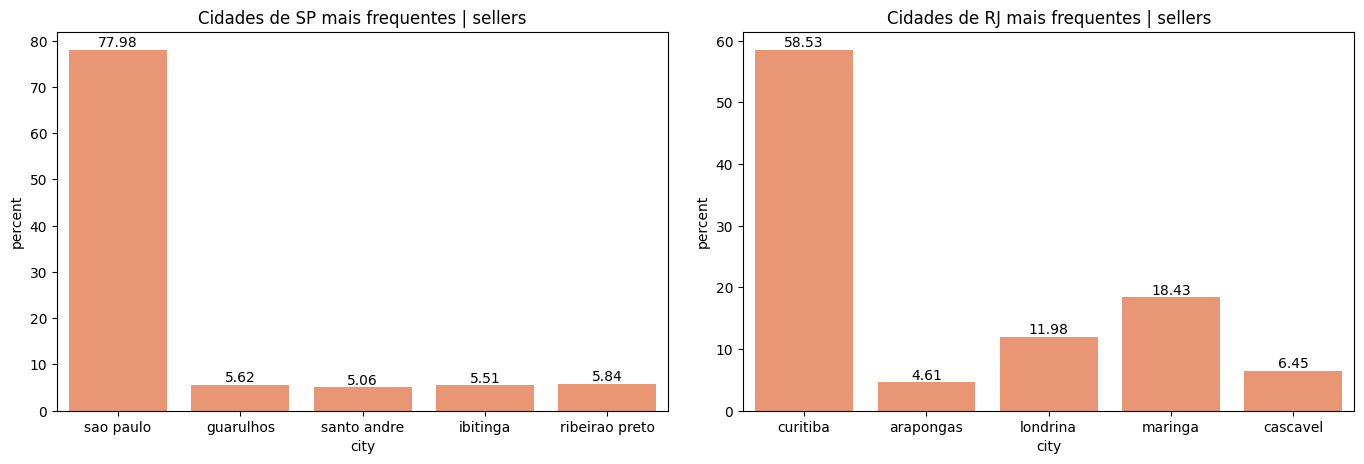

In [32]:
sellers_top5_SP = sellers[sellers["state"]=="SP"]["city"].value_counts().head().index
sellers_top5_PR = sellers[sellers["state"]=="PR"]["city"].value_counts().head().index

fig2, ax2 = plt.subplots(1,2, figsize=(14,5))

sns.countplot(data=sellers[sellers["city"].isin(sellers_top5_SP)], x="city", stat="percent", color=sns.color_palette("Set2")[1], ax=ax2[0])
ax2[0].set_title(f"Cidades de SP mais frequentes | sellers")

for i in ax2[0].containers:
    ax2[0].bar_label(i, fmt="%.2f")

sns.countplot(data=sellers[sellers["city"].isin(sellers_top5_PR)], x="city", stat="percent", color=sns.color_palette("Set2")[1], ax=ax2[1])
ax2[1].set_title(f"Cidades de RJ mais frequentes | sellers")

for i in ax2[1].containers:
    ax2[1].bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

### 3) Análise de products

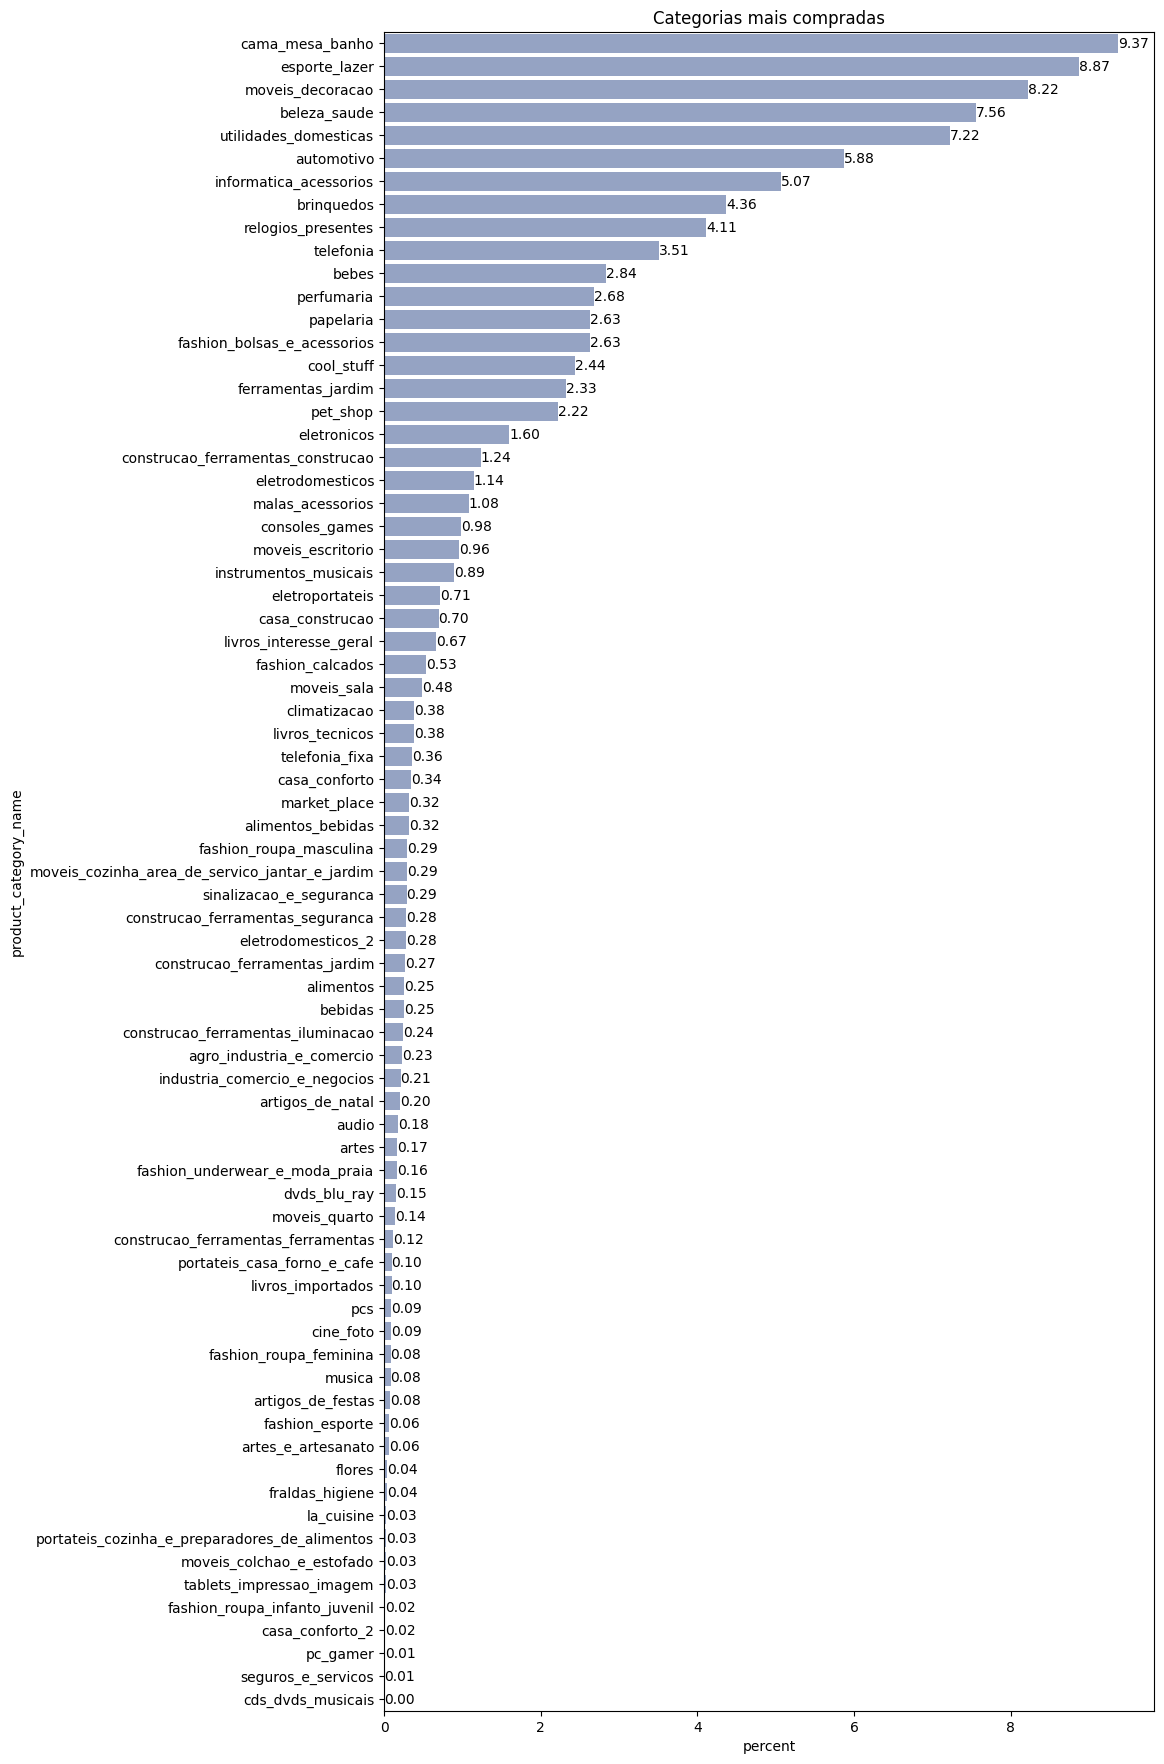

In [33]:
product_order = products["product_category_name"].value_counts().index

fig3, ax3 = plt.subplots(figsize=(12,18))

sns.countplot(data=products, y="product_category_name", orient="h", stat="percent", order=product_order, color=sns.color_palette("Set2")[2], ax=ax3)
ax3.set_title(f"Categorias mais compradas")

for i in ax3.containers:
    ax3.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

### 4) Análise de orders

In [34]:
orders["days_between_estimated_and_delivery"] = (pd.to_datetime(orders["order_delivered_customer_date"]) - pd.to_datetime(orders["order_estimated_delivery_date"])).dt.days
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,days_between_estimated_and_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,-8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,-6


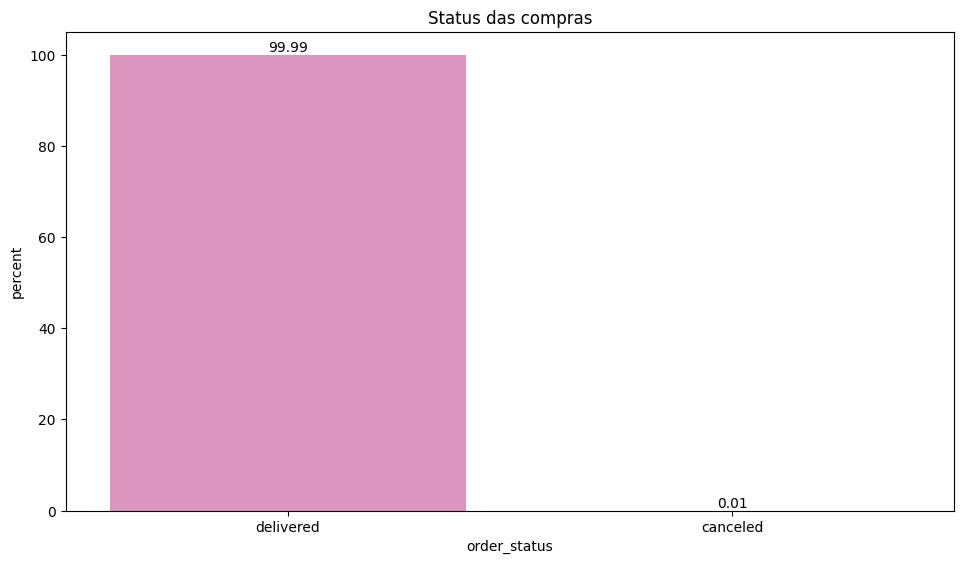

In [35]:
fig4, ax4 = plt.subplots(figsize=(10,6))

sns.countplot(data=orders, x="order_status", stat="percent", color=sns.color_palette("Set2")[3], ax=ax4)
ax4.set_title(f"Status das compras")

for i in ax4.containers:
    ax4.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

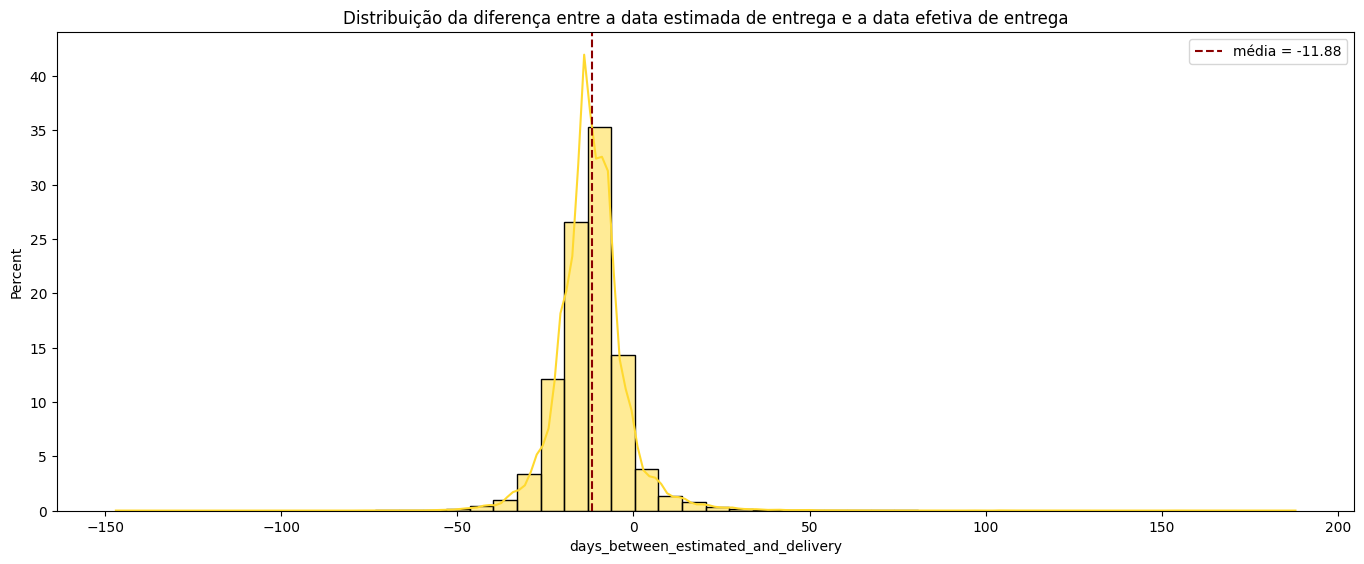

In [36]:
fig5, ax5 = plt.subplots(figsize=(14,6))

sns.histplot(data=orders, x="days_between_estimated_and_delivery", stat="percent", bins=50, kde=True, color=sns.color_palette("Set2")[5], ax=ax5)
ax5.axvline(orders["days_between_estimated_and_delivery"].mean(), color="darkred", linestyle="dashed", label=f"média = {orders['days_between_estimated_and_delivery'].mean():.2f}")
ax5.set_title(f"Distribuição da diferença entre a data estimada de entrega e a data efetiva de entrega")

plt.tight_layout(pad=2)
plt.legend()
plt.show()

### 5) Análise de order items

In [37]:
order_items1 =  order_items.merge(products[["product_id", "product_category_name"]], on="product_id", how="left")
order_items1.head(2)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,19.93,pet_shop


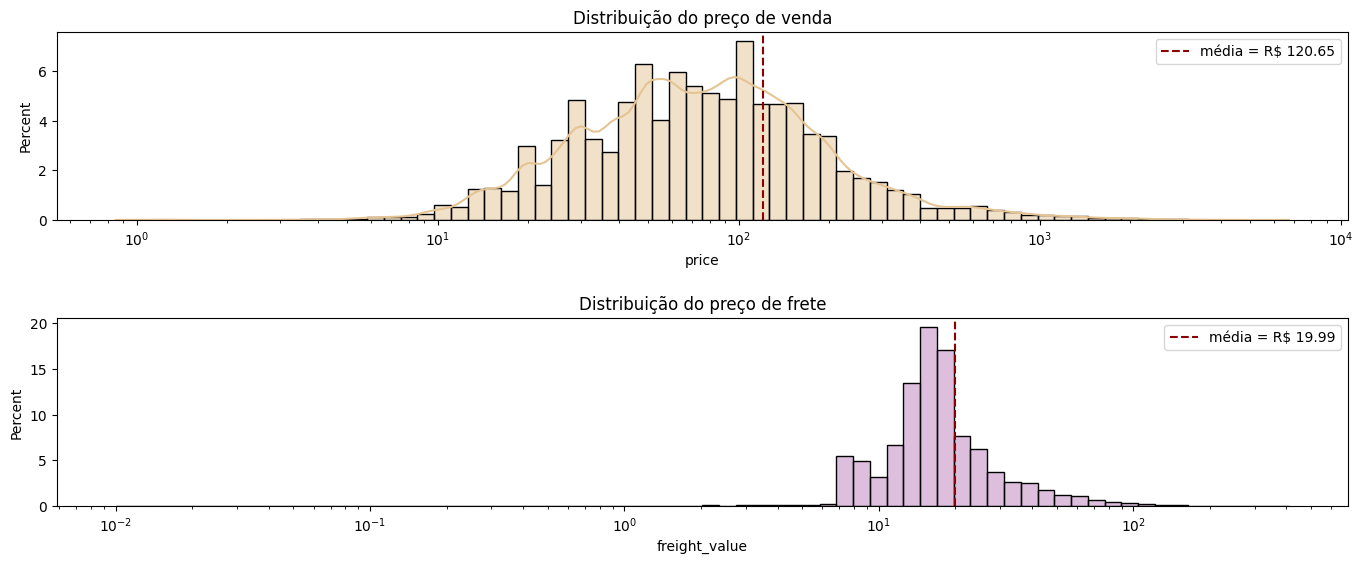

In [38]:
fig6, ax6 = plt.subplots(2, figsize=(14,6))

sns.histplot(data=order_items1, x="price", stat="percent", kde=True, log_scale=True, bins=70, color=sns.color_palette("Set2")[6], ax=ax6[0])
ax6[0].axvline(order_items1["price"].mean(), color="darkred", linestyle="dashed", label=f"média = R$ {order_items1['price'].mean():.2f}")
ax6[0].set_title(f"Distribuição do preço de venda")
ax6[0].legend()

sns.histplot(data=order_items1, x="freight_value", stat="percent", kde=True, log_scale=True,  bins=70, color=sns.color_palette("Set3")[9], ax=ax6[1])
ax6[1].axvline(order_items1["freight_value"].mean(), color="darkred", linestyle="dashed", label=f"média = R$ {order_items1['freight_value'].mean():.2f}")
ax6[1].set_title(f"Distribuição do preço de frete")
ax6[1].legend()

plt.tight_layout(pad=2)
plt.show()

### 6) Análise de order payments

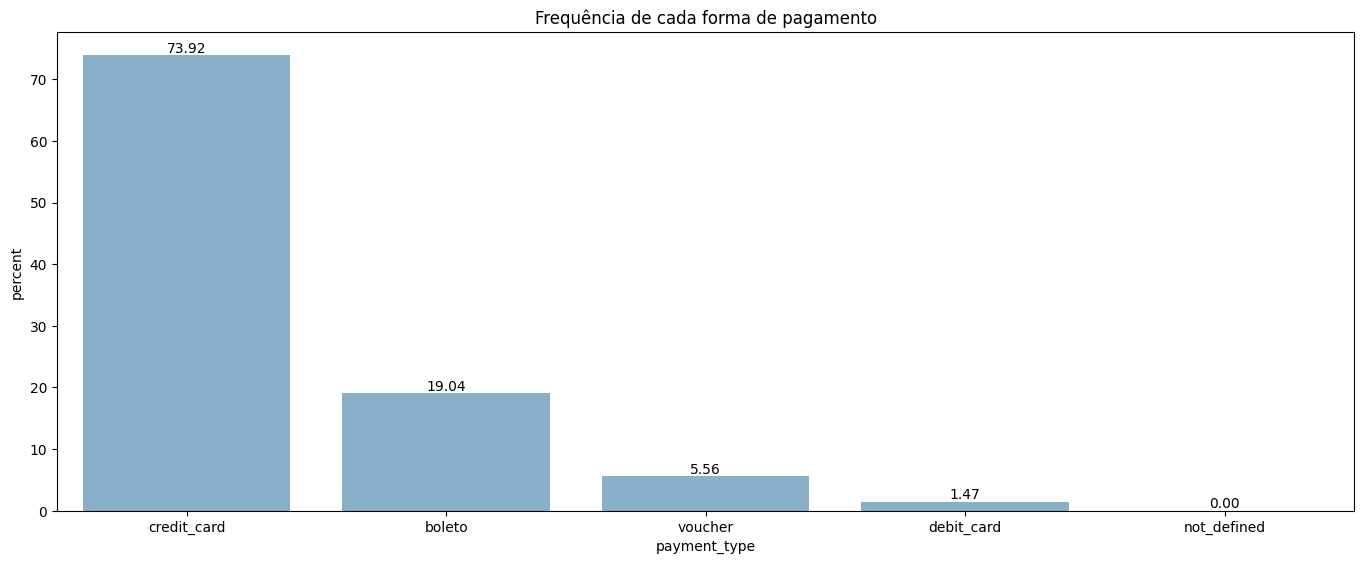

In [39]:
fig7, ax7 = plt.subplots(figsize=(14,6))

sns.countplot(data=order_payments, x="payment_type", stat="percent", color=sns.color_palette("Set3")[4], ax=ax7)
ax7.set_title(f"Frequência de cada forma de pagamento")

for i in ax7.containers:
    ax7.bar_label(i, fmt="%.2f")

plt.tight_layout(pad=2)
plt.show()

## Análises Multivariadas

### 1) Análise da relação entre valor do frete e a pontuação de avaliação:

- Objetivo: Entender como o frete afeta a satisfação do cliente.

In [4]:
order_items_reviews = order_items.merge(reviews, how='inner', on='order_id')
order_items_reviews.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59


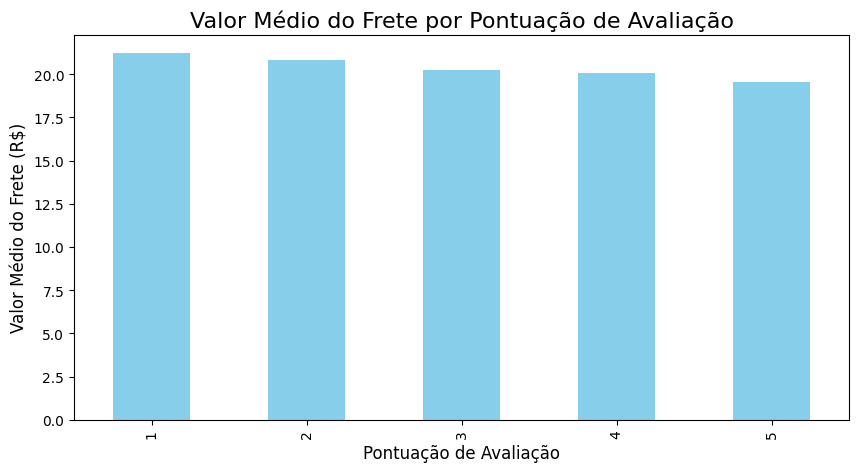

In [5]:
mean_freight_per_review = order_items_reviews.groupby('review_score')['freight_value'].mean()

plt.figure(figsize=(10, 5))
mean_freight_per_review.plot(kind='bar', color='skyblue')

plt.title('Valor Médio do Frete por Pontuação de Avaliação', fontsize=16)
plt.xlabel('Pontuação de Avaliação', fontsize=12)
plt.ylabel('Valor Médio do Frete (R$)', fontsize=12)

plt.show()

In [6]:
correlation = order_items_reviews['freight_value'].corr(order_items_reviews['review_score'])
print(f'Correlação entre Valor do Frete e Pontuação de Avaliação: {correlation}')

Correlação entre Valor do Frete e Pontuação de Avaliação: -0.03600619736517388


Não existem grandes variações no custo médio do frete para clientes que dão uma avaliação de 1 (avaliação ruim) em comparação com aqueles que dão uma avaliação de 5 (avaliação ótima).
Há uma leve tendência de diminuição no valor do frete médio conforme a pontuação de avaliação aumenta. Isso poderia sugerir que os clientes que pagam fretes ligeiramente mais altos podem estar menos satisfeitos, embora a diferença não seja drástica.
Ademais, o gráfico sugere não haver uma correlação forte entre o valor do frete e a pontuação de avaliação. Para conferir, realizamos o cálculo da correlação, a qual resultou em um valor próximo a zero (-0.0360), confirmando a baixa correlação. Assim, o valor do frete é bastante uniforme entre os diferentes grupos de avaliação, o que implica que o preço do frete pode não ser um fator determinante para a satisfação do cliente.

### 2) Impacto do tempo de entrega na avaliação do cliente:

- Objetivo: Verificar se a satisfação do cliente é afetada devido atrasos nas entregas.

In [7]:
orders_reviews = reviews.merge(orders, how='inner', on='order_id')
orders_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02 00:00:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14 00:00:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09 00:00:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10 00:00:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09 00:00:00


In [8]:
orders_reviews['order_delivered_customer_date'] = pd.to_datetime(orders_reviews['order_delivered_customer_date'])
orders_reviews['order_purchase_timestamp'] = pd.to_datetime(orders_reviews['order_purchase_timestamp'])
orders_reviews['delivery_time_days'] = (orders_reviews['order_delivered_customer_date'] - orders_reviews['order_purchase_timestamp']).dt.days

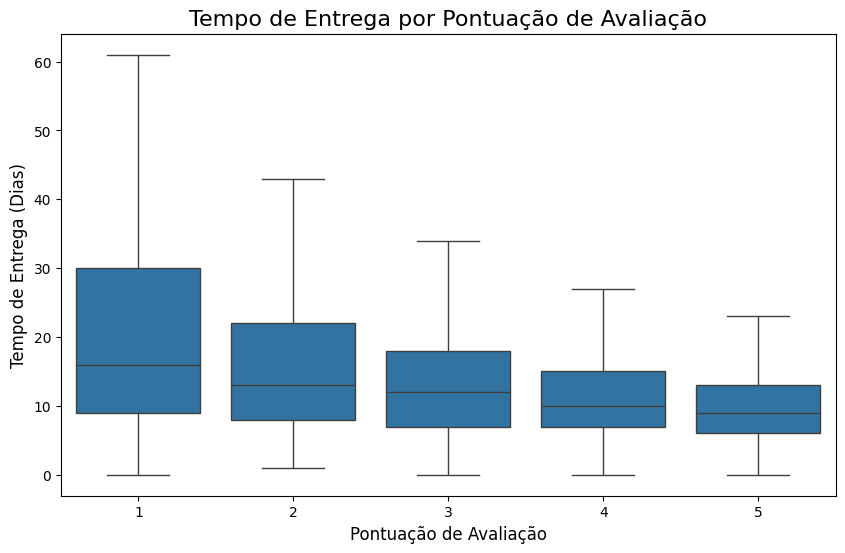

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_score', y='delivery_time_days', data=orders_reviews, showfliers=False)

plt.title('Tempo de Entrega por Pontuação de Avaliação', fontsize=16)
plt.xlabel('Pontuação de Avaliação', fontsize=12)
plt.ylabel('Tempo de Entrega (Dias)', fontsize=12)

plt.show()

Há uma clara tendência de diminuição do tempo de entrega conforme a pontuação de avaliação melhora. Ou seja, clientes que receberam suas encomendas mais rapidamente tendem a dar avaliações mais altas, enquanto tempos de entrega maiores estão mais associados a avaliações mais baixas. As avaliações mais baixas (1 e 2) têm medianas de tempo de entrega mais altas, indicando que o tempo médio de entrega é maior para esses grupos. Para pontuações mais altas (4 e 5), a mediana do tempo de entrega é significativamente menor, o que indica que tempos de entrega mais curtos e consistentes estão mais associados a avaliações positivas. Além disso, a dispersão (intervalo entre o primeiro e o terceiro quartil) das avaliações 1 e 2 é maior, mostrando uma variabilidade maior nos tempos de entrega, situação exatamente oposta às pontuações 4 e 5. Assim, o gráfico sugere que melhorar a velocidade e a consistência das entregas pode resultar em melhores avaliações.

### 3) Análise por categoria de produto e sua relação com volume de vendas e avaliações:

- Objetivo: Entender quais categorias de produtos são mais populares e mais bem avaliadas.

In [10]:
products_order_items = order_items.merge(products, how='inner', on='product_id')
products_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0


In [11]:
products_order_items_reviews = products_order_items.merge(reviews, how='inner', on='order_id')
products_order_items_reviews.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,b11cba360bbe71410c291b764753d37f,5,NaN,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,af01c4017c5ab46df6cc810e069e654a,4,super recomendo,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,8304ff37d8b16b57086fa283fe0c44f8,5,NaN,NaN,2017-08-10 00:00:00,2017-08-13 03:35:17
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,426f43a82185969503fb3c86241a9535,5,NaN,NaN,2017-08-25 00:00:00,2017-08-28 00:51:18


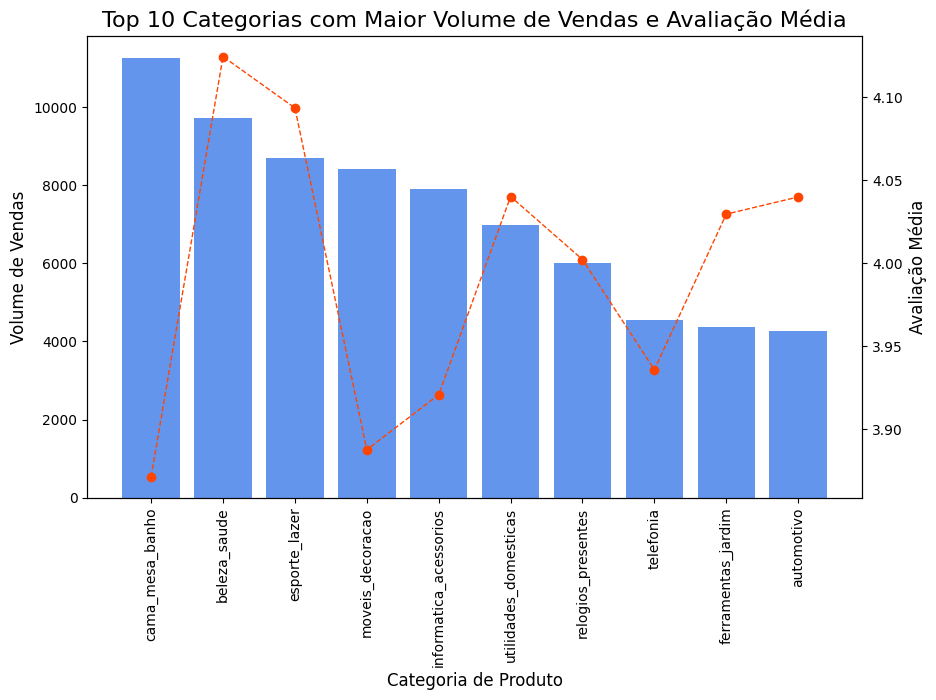

In [12]:
sales_per_category = products_order_items_reviews['product_category_name'].value_counts()
avg_review_per_category = products_order_items_reviews.groupby('product_category_name')['review_score'].mean()

top_categories = sales_per_category.nlargest(10).index
top_sales = sales_per_category[top_categories]
top_reviews = avg_review_per_category[top_categories]

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_sales.index, top_sales.values, color='#6495ED', label='Volume de Vendas')
ax1.set_xlabel('Categoria de Produto', fontsize=12)
ax1.set_ylabel('Volume de Vendas', fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Top 10 Categorias com Maior Volume de Vendas e Avaliação Média', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(top_sales.index, top_reviews.values, color='#FF4500', marker='o', label='Avaliação Média', linestyle='--', linewidth=1)
ax2.grid(False)
ax2.set_ylabel('Avaliação Média', fontsize=12)

plt.show()

A análise mostra que embora cama_mesa_banho tenha o maior volume de vendas, a avaliação média dos clientes é baixa, sugerindo problemas na experiência de compra, como qualidade ou entrega. Já categorias como utilidades_domesticas, beleza_saude e esporte_lazer tem boas avaliações, mas um volume de vendas menor, o que pode ser uma oportunidade de crescimento. Melhorar a satisfação nas categorias mais vendidas e dar mais visibilidade às bem avaliadas pode ser um bom caminho.

### 4) Análise por vendedores e sua relação com volume de vendas e avaliações:

- Objetivo: Entender quais vendedores de produtos tem maior volume de vendas e suas respectivas avaliações.

In [21]:
review_order_items = order_items.merge(reviews, how='inner', on='order_id')
sellers_review_order_items = review_order_items.merge(sellers, how='inner', on='seller_id')

In [22]:
sellers_review_order_items.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,55.9,9.94,1fac9acb29e014e3b9b393d5c8505f99,5,NaN,ÓTIMO,2017-07-29 00:00:00,2017-08-01 20:55:50,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,132.9,20.17,2eab04a8f45efa131d44cf58b37ab595,5,NaN,Recebi o patines em perfeitas condições bem an...,2017-08-25 00:00:00,2017-08-28 12:57:25,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,58.9,15.16,9d0e152a1983460f059ddffcb8af03bb,5,NaN,NaN,2017-10-20 00:00:00,2017-10-20 23:45:27,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,139.9,16.74,f4fad24d4bb3462bab004be9a0b753f0,4,NaN,"Atendimento excelente,o produto chegou antes d...",2017-07-11 00:00:00,2017-07-13 23:18:14,27277,volta redonda,SP


In [23]:
sellers_mean = sellers_review_order_items.groupby(['seller_id', 'seller_city']).agg(
    volume_vendas=('price', 'sum'),
    avaliacao_media=('review_score', 'mean')
).reset_index()

top_sellers = sellers.nlargest(10, 'volume_vendas')

codename = [f'seller_{letter}' for letter in string.ascii_uppercase[:10]]
top_sellers['codinome'] = codename

KeyError: 'volume_vendas'

NameError: name 'top_sellers' is not defined

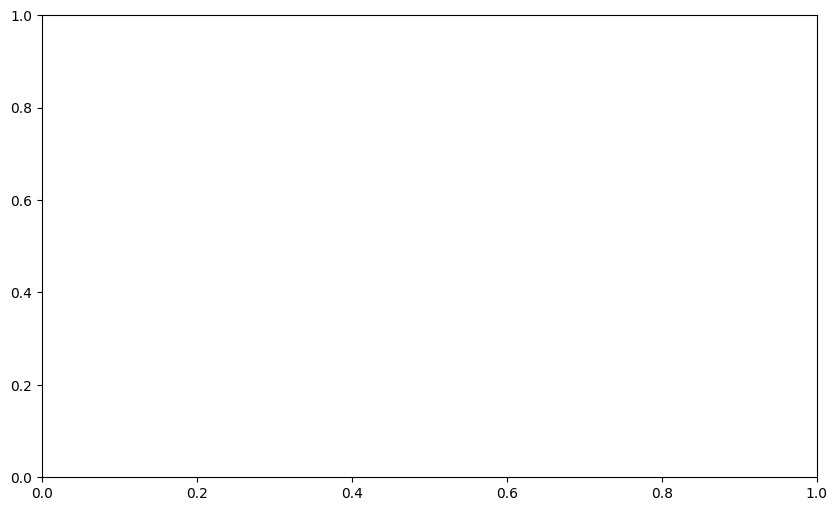

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_sellers['codinome'], top_sellers['volume_vendas'], color='lightgrey')
ax1.set_xlabel('Vendedor ID', fontsize=12)
ax1.set_ylabel('Volume de Vendas (R$)', fontsize=12)
ax1.tick_params(axis='x', rotation=90)
ax1.set_title('Top 10 Vendedores com Maior Volume de Vendas e Avaliação Média', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(top_sellers['codinome'], top_sellers['avaliacao_media'], color='orangered', marker='o', linestyle='--')
ax2.set_ylabel('Avaliação Média', fontsize=12)
ax2.tick_params(axis='y')

plt.tight_layout()
plt.show()

O gráfico revela que, embora vendedores como seller_A, seller_B e seller_C tenham os maiores volumes de vendas, suas avaliações médias são moderadas. Já o vendedor seller_E, apesar de ter um volume de vendas considerável, apresenta a pior avaliação, abaixo de 3.4. Isso sugere que um grande volume de vendas não garante uma alta satisfação dos clientes, e vendedores com avaliações mais baixas podem estar priorizando o volume sobre a qualidade do atendimento ou do produto.